In [ ]:
# Zillow prize: simple exploration notebook
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize

In [2]:
# Let us first import the necessary modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
# List the files present in the input folder
from subprocess import check_output
# print(check_output("ls", "/Users/Andrew/Desktop/Data Science/data/zillow-prize-1"), decode("utf8"))
# First, start with the train file exploration
train_df = pd.read_csv("/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/train_2016_v2.csv", parse_dates = ["transactiondate"])
print(train_df.shape)
print(train_df.head())

(90275, 3)
   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02


# Logerror

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


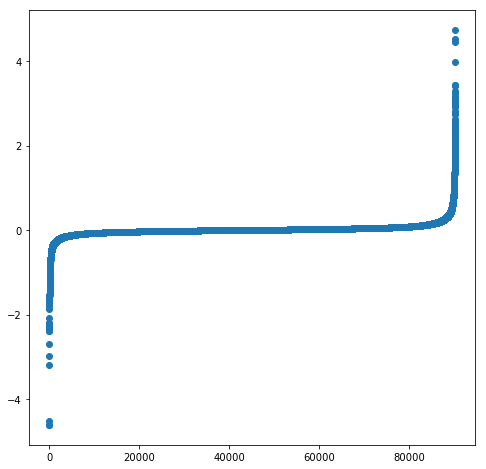

In [4]:
# Target variable for this competition is "logerror" field. So let us do some analysis on this field first
plt.figure(figsize = (8,8))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
print(type(train_df.logerror.values))
print(type(train_df.logerror))

In [14]:
# print(train_df['logerror']) # correct
#print(train_df.loc['logerror']) # not correct
#print(train_df.loc[:,'logerror']) # correct

Percentile 99%: 0.4637473199999981
Percentile 1%: -0.3425
Logerror max: 0.4638819999999963
Logerror min: -4.605
parcelid           903
logerror           903
transactiondate    903
dtype: int64
parcelid           903
logerror           903
transactiondate    903
dtype: int64


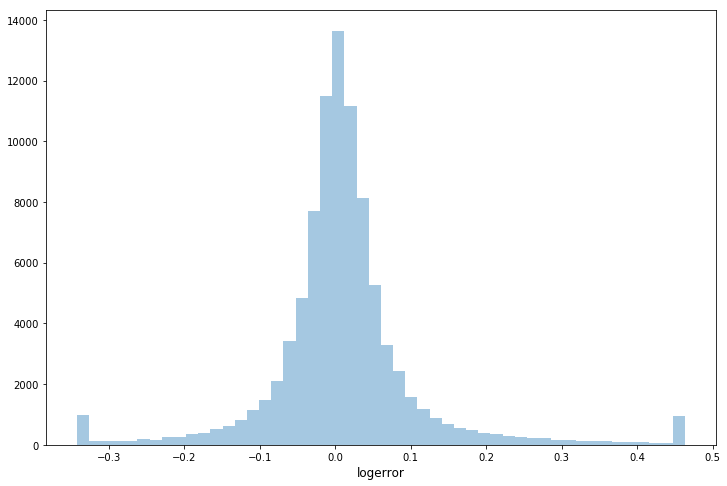

In [8]:
# This looks nice with some outliers at both the ends.!
# Let us remove the outliers and then do a histogram plot on the same.
ulimit = np.percentile(train_df.logerror.values, 99) # try 95%
llimit = np.percentile(train_df.logerror.values, 1) # try 5%
print('Percentile 99%: {}'.format(ulimit))
print('Percentile 1%: {}'.format(llimit))
print('Logerror max: {0}'.format(train_df.logerror.max()))
print('Logerror min: {0}'.format(train_df.logerror.min()))
print(train_df[train_df['logerror'] > ulimit].count())
train_df.loc[train_df['logerror'] > ulimit] = ulimit
#train_df[train_df['logerror'] > ulimit] = ulimit
train_df.loc[train_df['logerror'] < llimit] = llimit
#train_df[train_df['logerror'] < llimit] = llimit
print(train_df[train_df['logerror'] == ulimit].count())

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins = 50, kde = False)
plt.xlabel('logerror', fontsize=12)
plt.show()

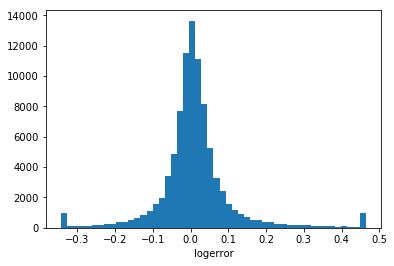

In [8]:
plt.hist(train_df.logerror.values, bins = 50)
plt.xlabel('logerror')
plt.show()

In [9]:
# Wow. nice normal distribution on the log error

### Transaction Date

Type of date column: datetime64[ns]

 6     10717
8     10287
7      9777
5      9776
9      9385
4      9119
3      8458
1      8209
2      6171
10     4881
11     1797
12     1698
Name: transaction_month, dtype: int64
<class 'pandas.core.series.Series'>

 transaction_month
1      8209
2      6171
3      8458
4      9119
5      9776
6     10717
7      9777
8     10287
9      9385
10     4881
11     1797
12     1698
Name: transaction_month, dtype: int64

 <class 'pandas.core.series.Series'>


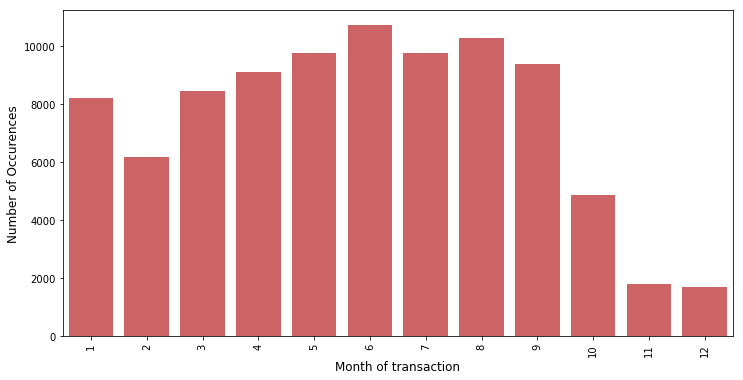

In [18]:
# Now let us explore the date field. Let us first check the number of transactions in each month
train_df['transaction_month'] = train_df['transactiondate'].dt.month
print('Type of date column: {}'.format(train_df['transactiondate'].dtype))
#print(train_df['transactiondate'].dt.month.head(5))
#print(train_df.head())
cnt_srs = train_df['transaction_month'].value_counts()
print('\n', cnt_srs)
print(type(cnt_srs))
#print('\n', train_df['transaction_month'].count())
print('\n', train_df.groupby('transaction_month')['transaction_month'].count())
print('\n', type(train_df.groupby('transaction_month')['transaction_month'].count()))

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.show()

# Parcel Id

In [11]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()
#print(train_df.head(5))
#print(type((train_df['parcelid'].value_counts().reset_index())))
#print((train_df['parcelid'].value_counts().reset_index()))

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [22]:
s = train_df.groupby('parcelid')['parcelid'].count()
print(type(s))
#print(s)
#print(s.index)
#print(s.values)
print(s.value_counts())

<class 'pandas.core.series.Series'>
1      88236
2        117
903        1
899        1
3          1
Name: parcelid, dtype: int64


In [13]:
(train_df['parcelid'].value_counts()).value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [14]:
# So most of the parcel ids are appearing only once in the dataset

In [15]:
train_df['parcelid'].duplicated().sum()

125

In [16]:
duplicated_bool = train_df['parcelid'].duplicated()
duplicated_df = train_df[duplicated_bool]
#print(duplicated_df.shape)
#print(duplicated_df.sort_values(by = 'parcelid')) 
# why i don't see duplicates?

       parcelid  logerror transactiondate  transaction_month
10829  10736972 -0.036700      2016-12-14                 12
9178   10790468 -0.044000      2016-09-13                  9
2227   10796614 -0.070400      2016-06-14                  6
24523  10798910 -0.027400      2016-05-24                  5
6292   10799924  0.412100      2016-08-09                  8
2232   10815854 -0.034600      2016-09-17                  9
21553  10818076 -0.050200      2016-11-18                 11
17031  10821829  0.137100      2016-12-30                 12
20055  10858080  0.086200      2016-05-09                  5
4270   10883535  0.012900      2016-09-30                  9
7889   10911172 -0.221900      2016-04-27                  4
18861  10961914  0.056400      2016-08-08                  8
814    11005771  0.054500      2016-06-17                  6
14707  11061551  0.042100      2016-12-20                 12
24503  11105038 -0.005000      2016-07-13                  7
9327   11121105  0.00800

In [17]:
train_df['parcelid'].unique()

array([11016594, 14366692, 12098116, ..., 12995401, 11402105, 12566293])

# Properties 2016

In [24]:
# let us explore the properties_2016 file
prop_df = pd.read_csv("/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/properties_2016.csv")
prop_df.shape

/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [25]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


## Missing values

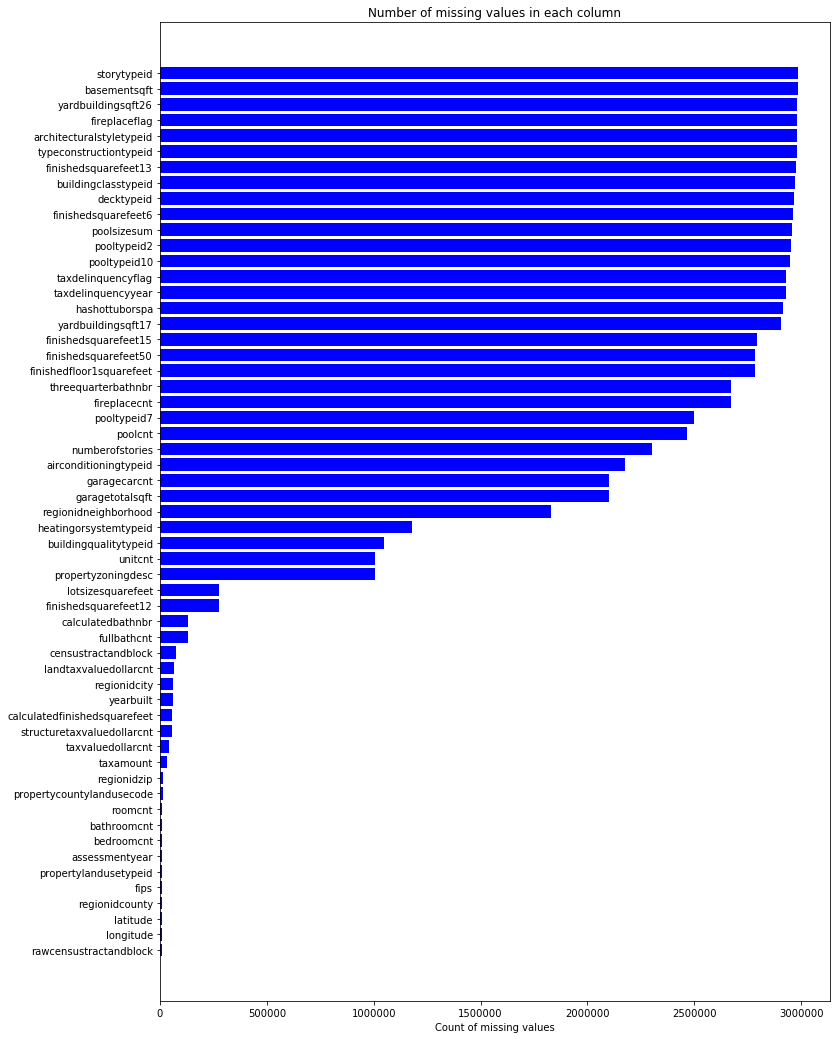

In [29]:
# There are so many NaN values in the dataset. So let us first do some exploration on that one
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
# missing_df.head()
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df.loc[missing_df['missing_count'] == 11437]
#missing_df.head()
#print(missing_df['missing_count'].value_counts())
missing_df = missing_df.sort_values(by='missing_count')
#print(missing_df)

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
ax.barh(ind, missing_df.missing_count.values, color = 'blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

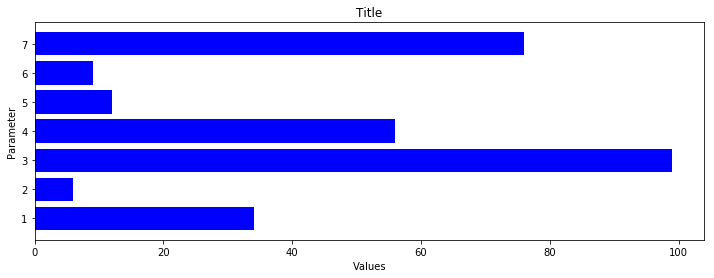

In [21]:
fig, ax = plt.subplots(figsize=(12,4))
ax.barh([1,2,3,4,5,6,7], [34,6,99,56,12, 9,76], color = 'blue')
ax.set_title("Title")
ax.set_xlabel("Values")
ax.set_ylabel("Parameter")
plt.show()

## Longitude and Latitude

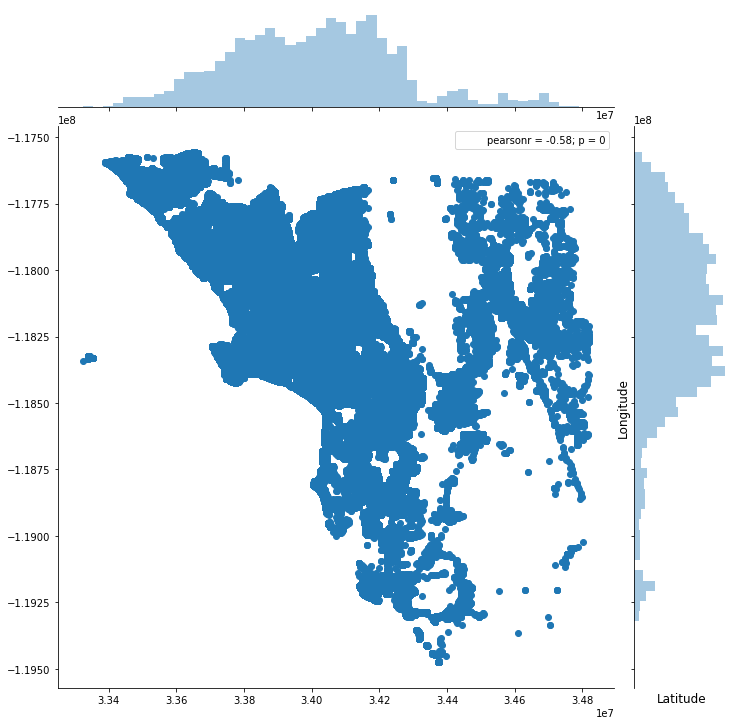

In [22]:
# Explore the latitude and longitude variable to begin with
#plt.figure(figsize(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size = 10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [34]:
# We have about 90,811 rows in train but we have about 2,985,217 rows in properties file. So let us merge the two files and then carry out our analysis.
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,1.10166e+07,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,1.43667e+07,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,1.20981e+07,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,1.26434e+07,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,1.44325e+07,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [35]:
# Now check the dtypes of different types of variable
pd.options.display.max_rows = 65
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ['Column in train_df', 'Column type']
dtype_df

,Column in train_df,Column type
0,parcelid,object
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [36]:
# Almost all are float variables with few object (categorical) variables. 
# Counts:
dtype_df.groupby('Column type').aggregate('count').reset_index()


,Column type,Column in train_df
0,float64,53
1,datetime64[ns],1
2,int64,1
3,object,6


In [26]:
# Number of Nulls in this new merged dataset
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count']/train_df.shape[0]
#print(missing_df.head(30))
#missing_df.sort_values(by = 'missing_count').head(60)
#missing_df.loc[missing_df['missing_ratio'] > 0.999]
print(missing_df.loc[missing_df['missing_ratio'] > 0.999, :])

                  column  missing_count  missing_ratio
6           basementsqft          90232       0.999524
9    buildingclasstypeid          90259       0.999823
16  finishedsquarefeet13          90242       0.999634
44           storytypeid          90232       0.999524


In [27]:
# Four columns have missing values 99.9% of the times.!

# Univariate Analysis

In [39]:
# Since there are so many variables, first let's take the 'float' variables alone and then get the correlation with the target variable to see how they are related
# Before let's impute missing values with mean values to compute correlation coefficients
mean_values = train_df.mean(axis=0)
print(mean_values.head())
train_df_new = train_df.fillna(mean_values, inplace = True)

parcelid                    1.273343e+07
logerror                    1.040267e-02
transaction_month           5.757253e+00
airconditioningtypeid       1.820043e+00
architecturalstyletypeid    7.231660e+00
dtype: float64


/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


               col_labels  corr_values
0                parcelid    -0.035793
34         regionidcounty    -0.012402
23               latitude    -0.010495
22  heatingorsystemtypeid    -0.006681
42     yardbuildingsqft17    -0.006254


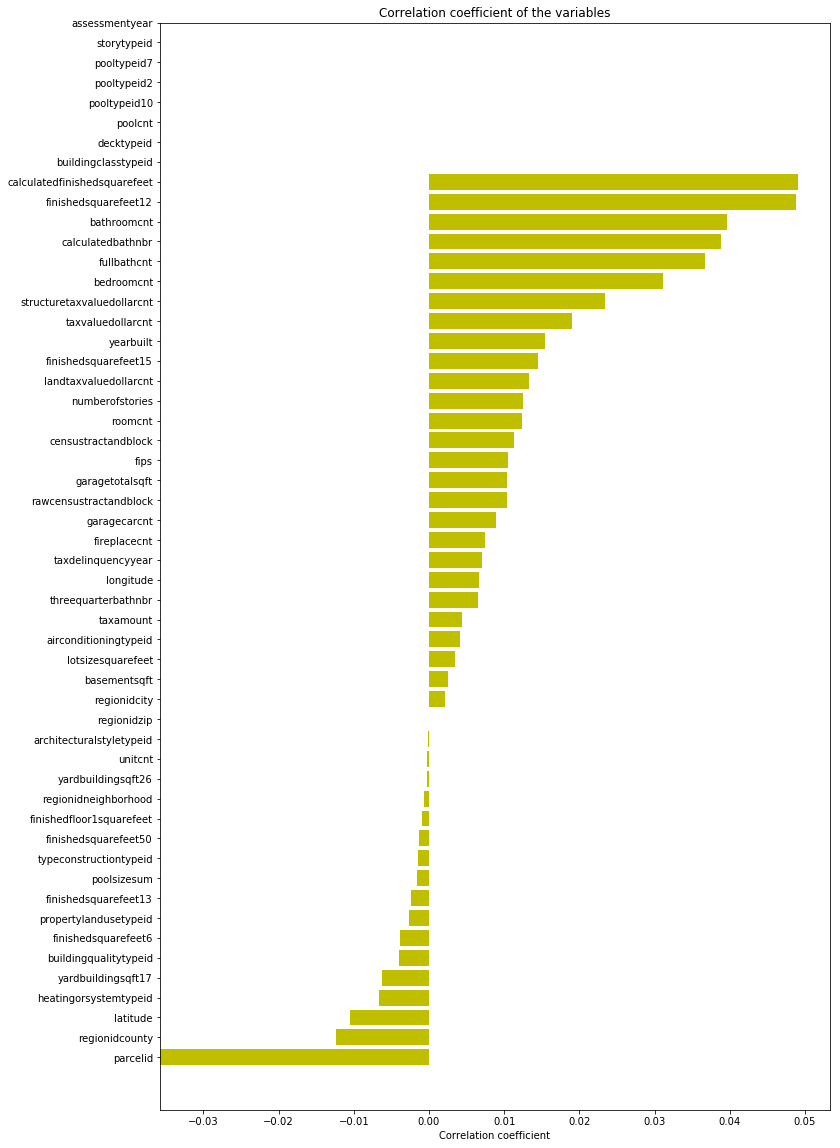

In [40]:
# Now let us look at the correlation coefficient of each of these variables
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype == 'float64']
#x_cols
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')
print(corr_df.head())

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,20))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color = 'y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [41]:
# The correlation of the target variable with the given set of variables are low overall.
# There are few variables at the top of this graph without any correlation values. I guess they have only one unique value and hence no correlation value. Let us confirm the same.
corr_df.loc[abs(corr_df.corr_values.values) < 0.001]
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


In [146]:
# Let us take the variables with high correlation values and then do some analysis on them
corr_df_sel = corr_df.loc[abs(corr_df.corr_values.values) > 0.01]
corr_df_sel

/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


,col_labels,corr_values
49,taxamount,-0.014769
21,heatingorsystemtypeid,-0.013734
19,garagecarcnt,0.010403
44,numberofstories,0.010884
20,garagetotalsqft,0.012003
13,finishedsquarefeet15,0.012397
31,rawcensustractandblock,0.012929
16,fips,0.012982
36,roomcnt,0.013046
51,censustractandblock,0.013878


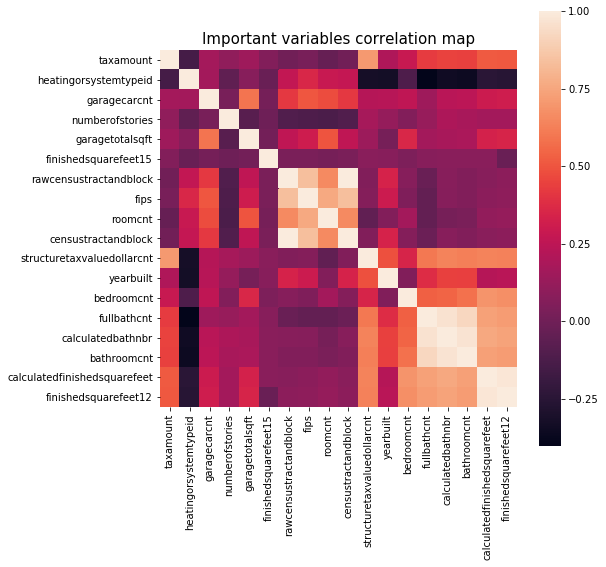

In [154]:
#print(corr_df_sel.head(5))
cols_to_use = corr_df_sel.col_labels.tolist()
#print(cols_to_use)

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method = 'spearman')

f, ax = plt.subplots(figsize=(8,8))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [ ]:
# The important variables themselves are very highly correlated.! Let's  look at each of them

## finishedsquarefeet12

ulimit: 5851.0015515568475
max: 5851.002462788647
llimit: 560.0
min: 560.0


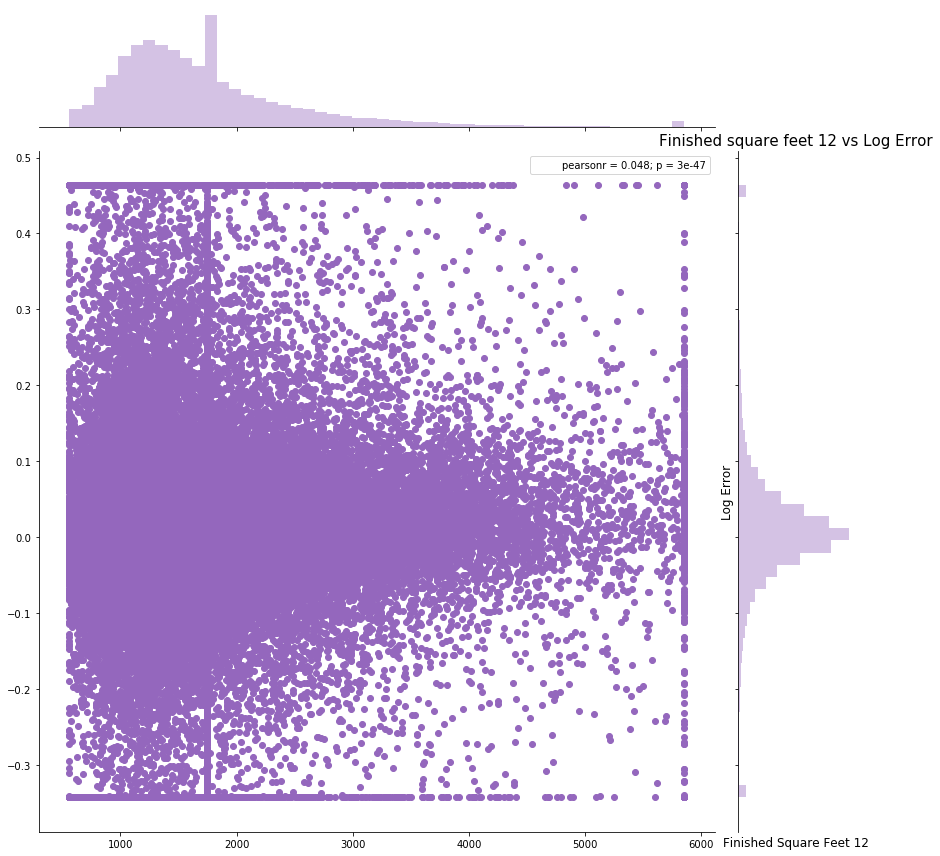

In [169]:
# finishedsquarefeet12 - highest correlation with logerror
# how the finishedsquarefeet12 varies with the log error
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col], 99.5)
print('ulimit: {0}'.format(ulimit))
print('max: {0}'.format(np.max(train_df[col])))
llimit = np.percentile(train_df[col].values, 0.05)
print('llimit: {0}'.format(llimit))
print('min: {0}'.format(np.min(train_df[col])))
train_df[col].loc[train_df[col] > ulimit] = ulimit
train_df[col].loc[train_df[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values,
              y=train_df.logerror.values, 
              size = 12, 
              color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 vs Log Error", fontsize=15)
plt.show()


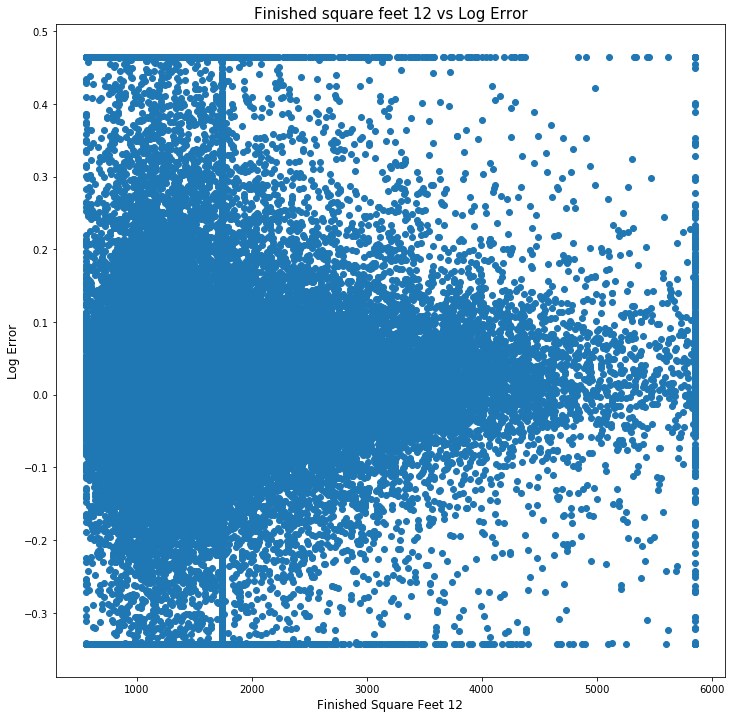

In [212]:
plt.figure(figsize=(12,12))
plt.scatter(x=train_df.finishedsquarefeet12.values,
            y=train_df.logerror.values)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 vs Log Error", fontsize=15)
plt.show()

In [ ]:
# Seems the range of logerror narrows down with increase in finished square feet 12 variable. Probably larger houses are easy to predict?

## calculatedfinishedsquarefeet

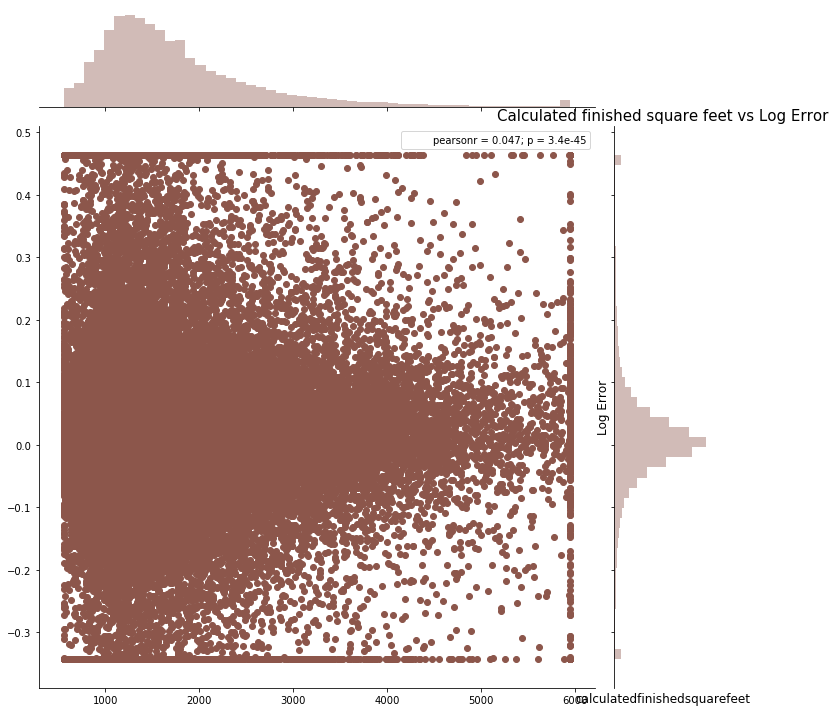

In [219]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_df.calculatedfinishedsquarefeet.values, 99.5)
llimit = np.percentile(train_df.calculatedfinishedsquarefeet.values, 0.5)
train_df[col].loc[train_df[col] > ulimit] = ulimit
train_df[col].loc[train_df[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.calculatedfinishedsquarefeet.values,
              y=train_df.logerror.values,
             size=10,color=color[5])
plt.ylabel("Log Error", fontsize=12)
plt.xlabel("calculatedfinishedsquarefeet", fontsize=12)
plt.title("Calculated finished square feet vs Log Error", fontsize=15)
plt.show()

In [ ]:
# Here as well the distribution is very similar to the previous one. No wonder the correlation between the two variables are also high

## bathroomcnt

20.0


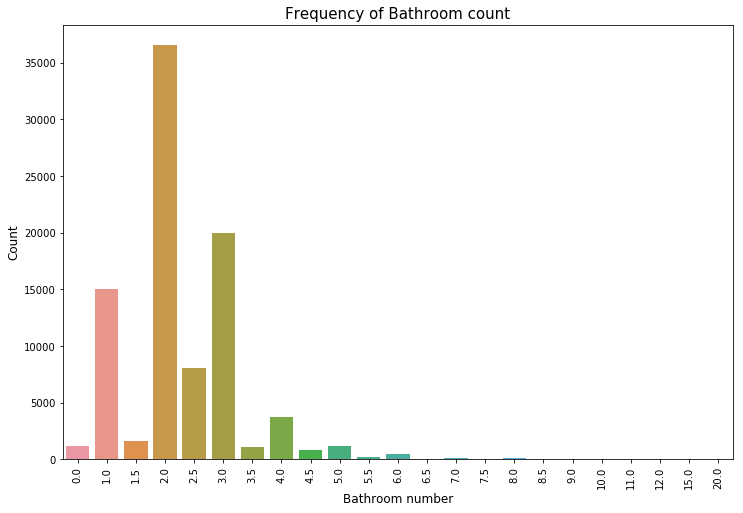

In [222]:
plt.figure(figsize=(12,8))
sns.countplot(x='bathroomcnt', data=train_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom number', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Bathroom count', fontsize=15)
print(max(train_df.bathroomcnt))
plt.show()

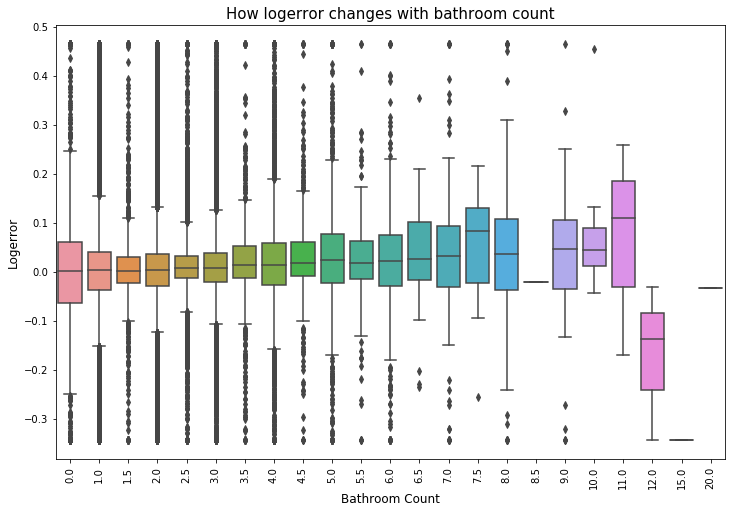

In [225]:
#  let's check how the log error changes based on barhroom counts
plt.figure(figsize=(12,8))
sns.boxplot(x='bathroomcnt', y='logerror', data=train_df)
plt.ylabel('Logerror', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('How logerror changes with bathroom count', fontsize=15)
plt.show()

## bedroomcnt

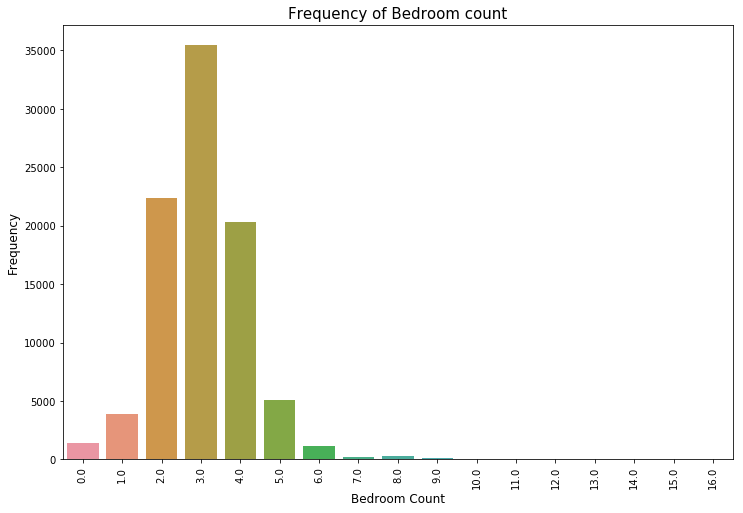

In [226]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

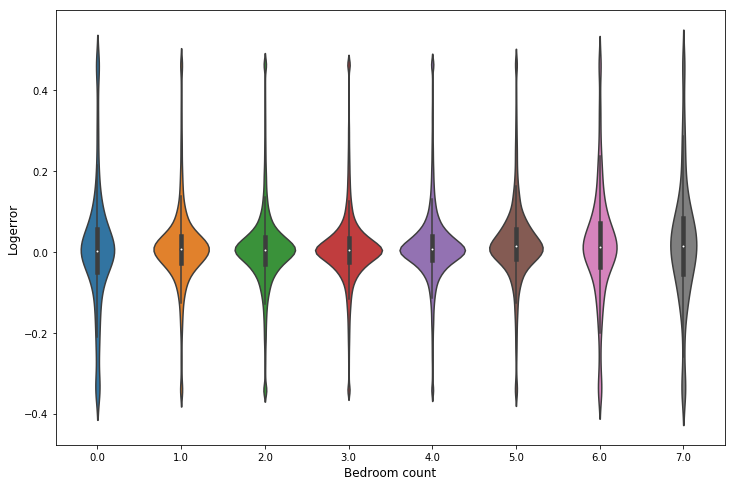

In [233]:
train_df['bedroomcnt'].loc[train_df['bedroomcnt'] > 7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_df)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Logerror', fontsize=12)
plt.show()

## taxamount

41786.7296
306.26469
2894     165.96
3098     200.42
4349     165.92
4943     150.16
4972     221.00
6709     108.98
7321     165.84
8306     221.00
11777    189.08
12176     64.00
12217    165.90
12231    165.90
21632    289.32
24547    102.02
25516     85.96
26825    133.32
27401    184.66
28197    295.88
28207     96.74
28274    259.02
30212    181.22
36926    126.72
37203    294.42
37272    240.90
44273    285.09
50015    126.28
51390    305.94
53771    282.40
54564     49.08
58144    260.48
60152    273.44
60420    243.41
61714    236.86
62877    244.11
65405    193.40
67372    252.32
68986     51.40
70874    264.33
73604    212.22
77882    299.31
78654    268.56
83113    233.33
84211    284.46
84385    287.17
86251    150.87
89840    226.30
Name: taxamount, dtype: float64


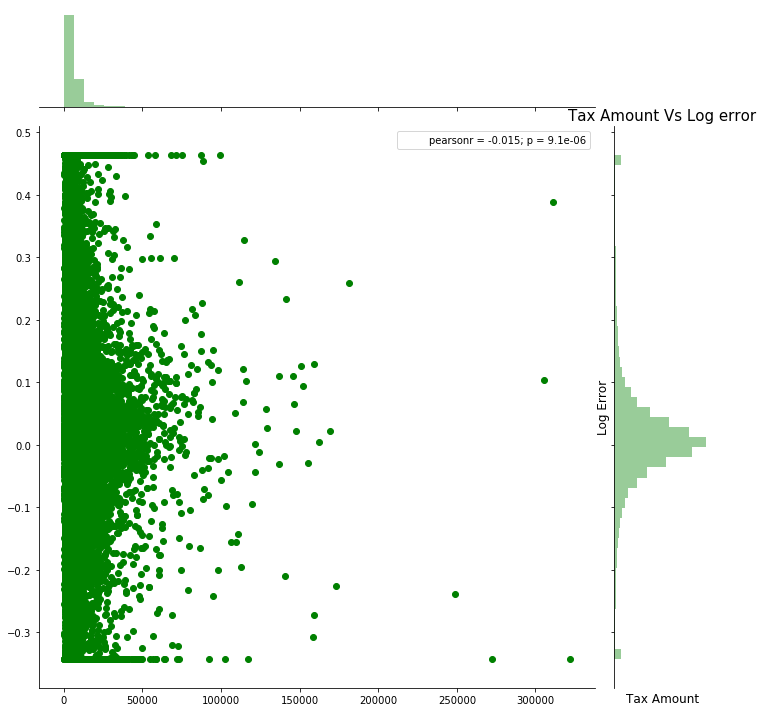

In [31]:
import numpy as np
#print(train_df.head())
col = 'taxamount'
ulimit = np.percentile(train_df[col], 99.5)
llimit = np.percentile(train_df[col], 0.05)
train_df[train_df[col] > ulimit][col] = ulimit
train_df[train_df[col] < llimit][col] = llimit
print(ulimit)
print(llimit)
print(train_df[train_df[col] < llimit][col])

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.taxamount.values, 
              y=train_df.logerror.values,
              size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

## yearbuilt

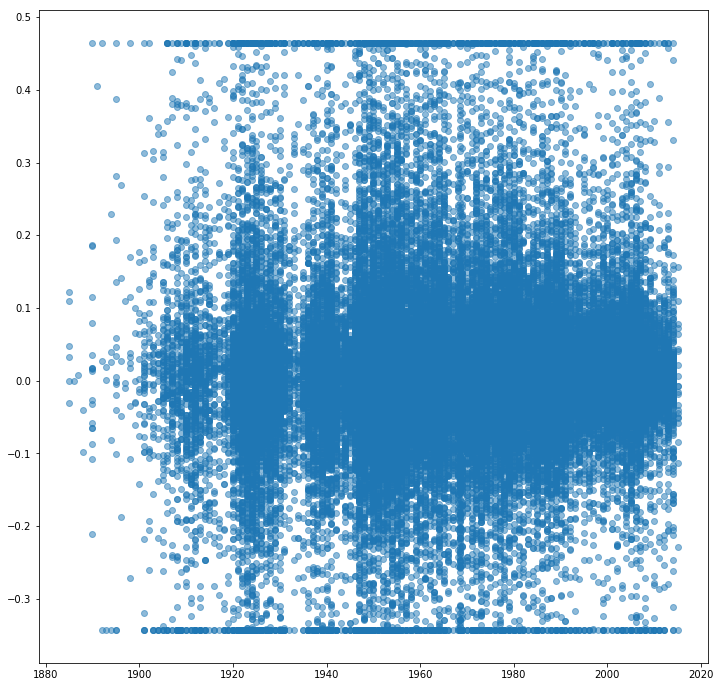

In [246]:
plt.figure(figsize=(12,12))
plt.scatter(x=train_df.yearbuilt.values, 
            y=train_df.logerror.values,
            alpha=0.5)
plt.show()

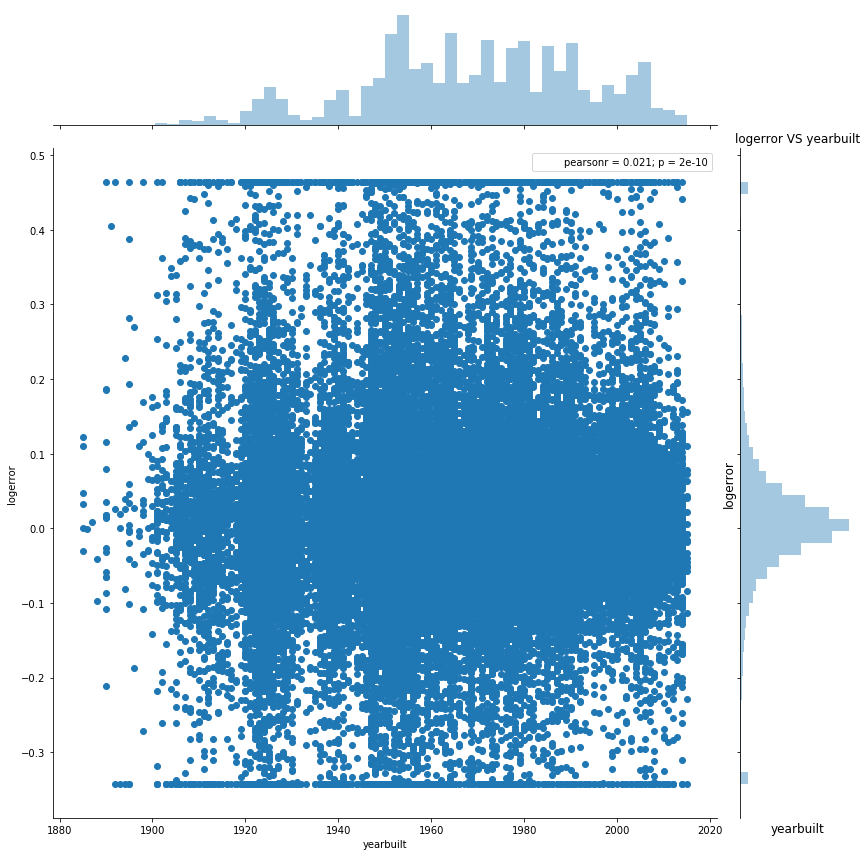

In [38]:
sns.jointplot(x = train_df['yearbuilt'], y = train_df['logerror'], size = 12)
plt.xlabel('yearbuilt', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)
plt.title('logerror VS yearbuilt')
plt.show()

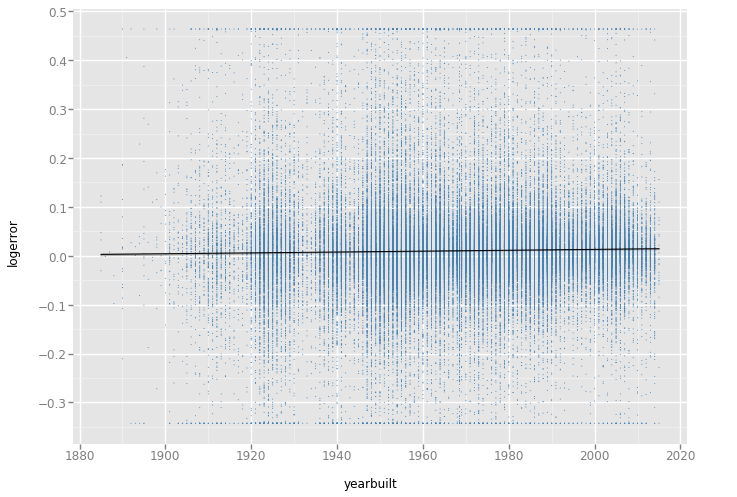

<ggplot: (-9223372036555273191)>

In [42]:
from ggplot import *
ggplot(aes(x='yearbuilt', y='logerror'), data=train_df) + \
    geom_point(color='steelblue', size=1) + \
    stat_smooth()

## Latitude and longitude

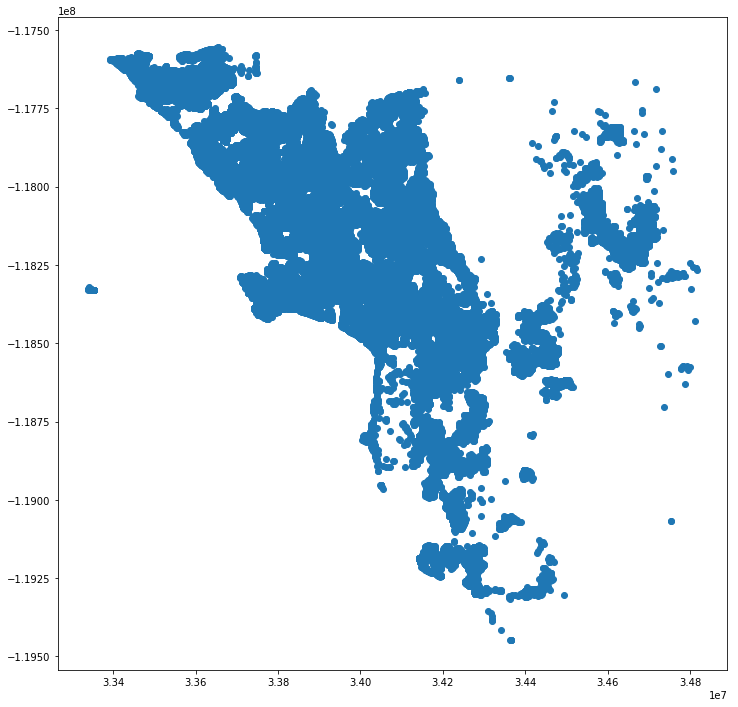

In [257]:
# Let's check wether there is dependency (patterns) between logerror and geographical coordinates
plt.figure(figsize=(12,12))
plt.scatter(x=train_df.latitude.values, 
            y=train_df.longitude.values
           )
plt.show()
# not informative

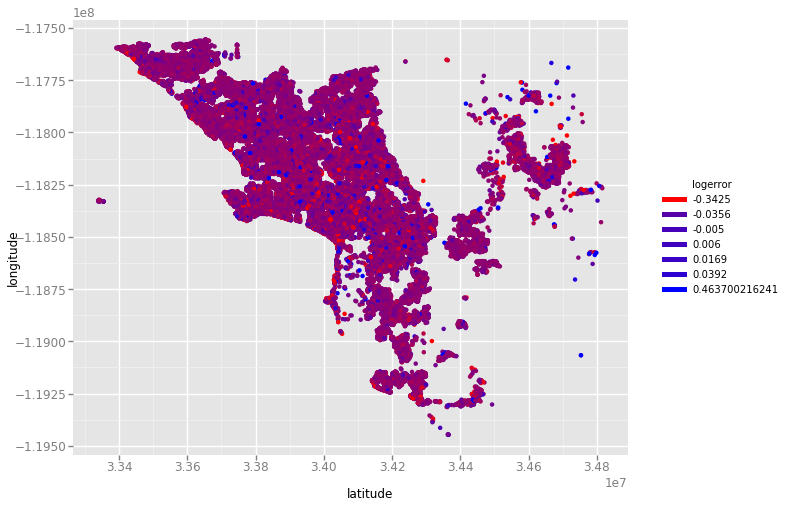

<ggplot: (-9223372036490754444)>

In [262]:
from ggplot import *
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=train_df) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'blue')

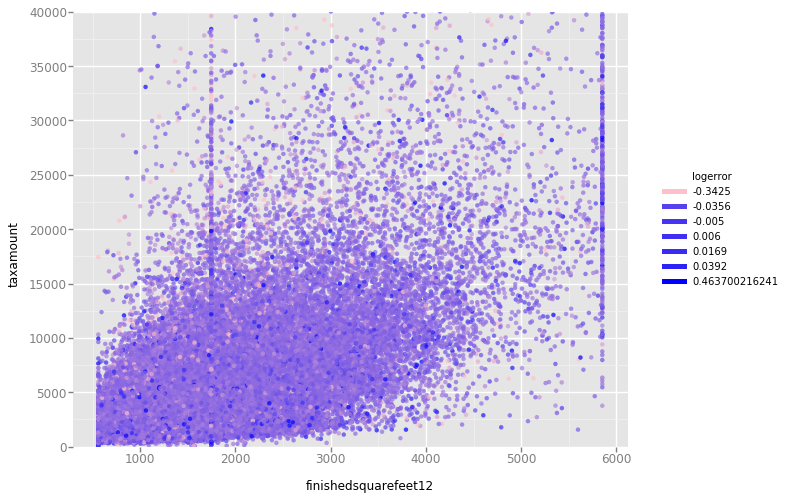

<ggplot: (-9223372036539352004)>

In [270]:
# There are no visible pockets as such with respect to latitude or longitude atleast with the naked eye.
# Let's take the variables with highest positive correlation and highest negative correlation to see if we can see some visible patterns.
ggplot(aes(x = 'finishedsquarefeet12', y = 'taxamount', color = 'logerror'), data=train_df) + \
    geom_point(alpha=0.7) + \
    scale_color_gradient(low='pink', high='blue') + \
    ylim(0,40000)


Put a bird on it!


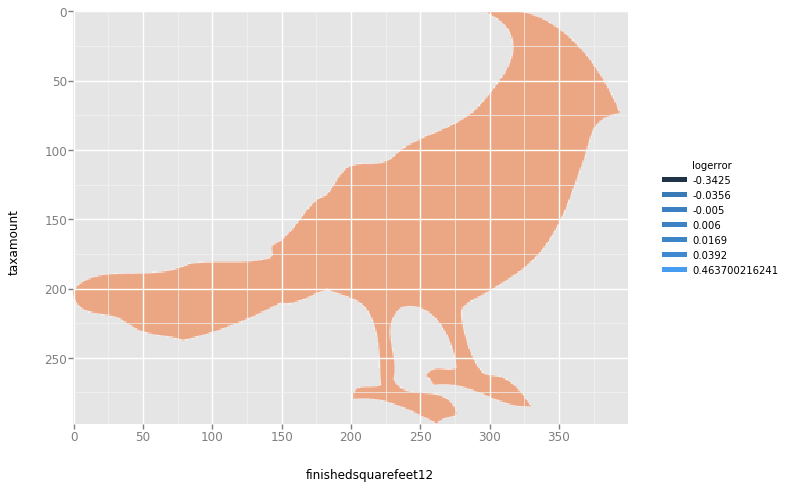

<ggplot: (401903985)>

In [271]:
# There are no visible patterns here as well. So this is going to be a hard competition to predict I guess.

ggplot(aes(x='finishedsquarefeet12', y='taxamount', color='logerror'), data=train_df) + \
    geom_now_its_art()

### Tree model for choosing important variables

In [46]:
# We had an understanding of important variables from the univariate analysis. But this is on a stand alone basis and also we have linearity assumption. Now let us build a non-linear model to get the important variables by building Extra Trees model
#train_df.head()
mean_values = train_df.mean(axis=0)
#print(mean_values)
#mean_values.head()
train_df_new = train_df.fillna(mean_values, inplace = True)
train_y = train_df.logerror.values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
# let's automate choosing categorical columns
cat_cols1 = [col for col in train_df.columns if train_df[col].dtype == 'object']
print(cat_cols1)
train_df_new = train_df_new.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month'] + cat_cols, axis=1)
feat_names = train_df_new.columns.values


['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']


[25 29 37 27  8 28 47  5 12 39  1 42  2 16 26 33 15 41  9 14 38 17 44 40 19
 36 13 20 21  0 18  7  3 30  6 50 32 34 31 51  4 35 11 23 22 10 43 46 24 48
 45 49]
[49 45 48 24 46 43 10 22 23 11 35  4 51 31 34 32 50  6 30  3]
20
range(0, 20)


(-1, 20)

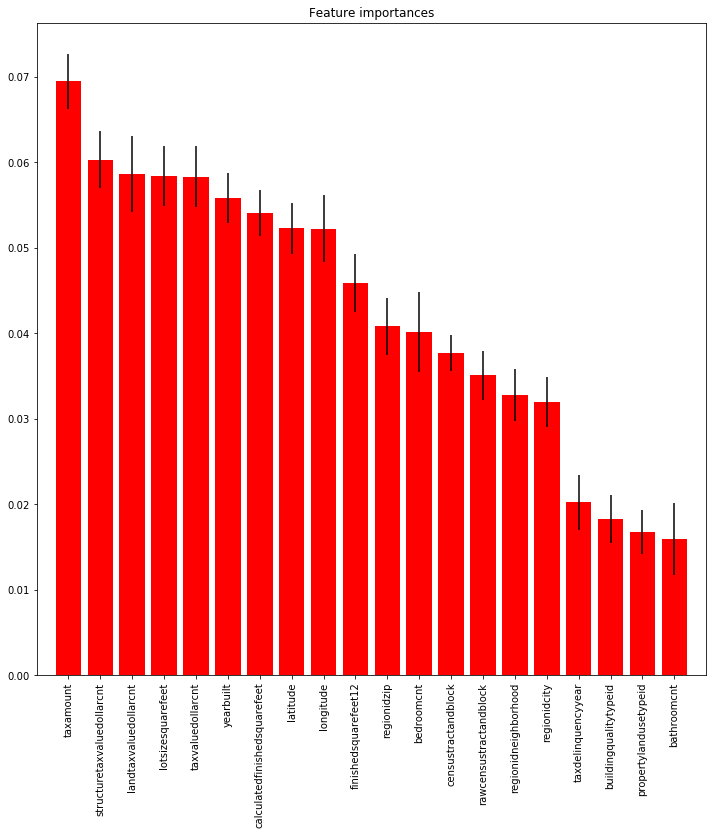

In [52]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30,max_features=0.3,n_jobs=-1,random_state=0)
model.fit(train_df_new, train_y)
#print(model)
# plot the importance
importances = model.feature_importances_
#print(importances)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
#print(len(std))
#print(len(model.estimators_))

indices_o = np.argsort(importances) # [::-1] - to reverse order
print(indices_o)
indices = np.argsort(importances)[::-1][:20] # [::-1] - to reverse order
print(indices)
print(len(indices))
print(range(len(indices)))

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='r', yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
#plt.show()

In [ ]:
# Seems "tax amount" is the most importanct variable followed by "structure tax value dollar count" and "land tax value dollor count"
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed': 0
}
print(xgb_params)
dtrain = xgb.DMatrix(train_df_new, train_y, feature_names=train_df_new.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)
# plot important features
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show
# Using xgboost, the important variables are 'structured tax value dollar count' followed by 'latitude' and 'calculated finished square feet'

# Reducing DataFrame memory size by ~65%

In [407]:
# https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
# This notebook shows how I reduce the size of the properties dataset by selecting smaller datatypes.
# I noticed the size of the properties dataset is pretty big for a lower/mid-range laptop so I made a script to make the dataset smaller without losing information.
# This notebook uses the following approach:
# - Iterate over every column
# - Determine if the column is numeric
# - Determine if the column can be represented by an integer
# - Find the min and the max value
# - Determine and apply the smallest datatype that can fit the range of values
# - This reduces the dataset from approx. 1.3 GB to 466 MB

import numpy as np
#import panda as pd

# Function for reducing memory usage of a pandas dataframe
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2
    print('Memory usage of properties dataframe is: ', start_mem_usg, ' MB')
    NAlist = [] # Keeps track of columns that have missing values filled in
    for col in props.columns:
        if props[col].dtype != object:
            # Print current column type
            print("*************************")
            print('Column: ', col),
            print('dtype before: ', props[col].dtype)
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            # integer doesn't support NA, so, NA needs to be filled
            if not np.isfinite(props[col]).all():
                NAlist.append(col)
                props[col].fillna(mn-1, inplace=True)
            # test if column can be converted to an integer
            # test for decimal part in numbers
            asint = props[col].fillna(0).astype(np.int64)
            result = (prop_df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True
            
            # Make Integre/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx <= np.iinfo(np.uint8).max:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < np.iinfo(np.uint16).max:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < np.iinfo(np.uint32).max:
                        props[col] = props[col].astype(np.uint32)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)
                    # Make float datatypes 32 bit 
                    else:
                        props[col] = props[col].astype(np.float32)
                    # Print new column type
        print('dtype after: ', props[col].dtype)
        print('*************************')
    # Print final result   
    print("___Memory usage after completion:___")
    mem_usg = props.memory_usage().sum() / 1024**2
    print('Memory usage is: ', mem_usg, ' MB')
    print('This is ', 100*mem_usg/start_mem_usg, "% of the initial size")
    return props, NAlist



In [386]:
print(prop_df.memory_usage().sum())
#np.isfinite(prop_df[col]).all()
#prop_df.shape
#prop_df[col].fillna(0).astype(np.int64)
#np.iinfo(np.uint32)

np.nan
a = [1,4,np.nan, 35, np.inf]
#print(np.isfinite(a))
#print(np.isfinite(a).all())

asint = prop_df['basementsqft'].fillna(0).astype(np.int64)
#print(asint[1:100])
#print(prop_df['basementsqft'][1:100,])
#result = (prop_df[col] - asint)
#result = result.sum()


           

1385140768


In [424]:
# Load data
prop_df = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/properties_2016.csv')
prop_df.head()
#train = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/train_2016_v2.csv')
#samp = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/sample_submission.csv')

/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [426]:
prop_df.dtypes # a lot of float64
#np.finfo(np.float64)

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [429]:
# Run function
prop_df_reduced, NAlist = reduce_mem_usage(prop_df)
print("-----------------------")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("-----------------------")
print("")
print(NAlist)

Memory usage of properties dataframe is:  1320.9731750488281  MB
*************************
Column:  parcelid
dtype before:  int64
dtype after:  uint32
*************************
*************************
Column:  airconditioningtypeid
dtype before:  float64
dtype after:  uint8
*************************
*************************
Column:  architecturalstyletypeid
dtype before:  float64
dtype after:  uint8
*************************
*************************
Column:  basementsqft
dtype before:  float64
dtype after:  uint16
*************************
*************************
Column:  bathroomcnt
dtype before:  float64
dtype after:  float64
*************************
*************************
Column:  bedroomcnt
dtype before:  float64
dtype after:  uint8
*************************
*************************
Column:  buildingclasstypeid
dtype before:  float64
dtype after:  uint8
*************************
*************************
Column:  buildingqualitytypeid
dtype before:  float64
dtype after: 

In [432]:
# why calculatedbathnbr isn't converted?
print(prop_df_reduced['calculatedbathnbr'].dtype)
print(prop_df_reduced['calculatedbathnbr'].min())
print(prop_df_reduced['calculatedbathnbr'].max())
#prop_df_reduced['calculatedbathnbr']
#np.iinfo(np.uint8)

float64
0.0
20.0


# Simple XGBoost Starter

In [463]:
# https://www.kaggle.com/anokas/simple-xgboost-starter-0-0655
import numpy as np
import pandas as pd
import xgboost as xgb
import gc

ImportError: No module named 'xgboost'

In [ ]:
print('Loading data ...')
prop = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/properties_2016.csv')
train = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/train_2016_v2.csv')
sample = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/sample_submission.csv')
print('Binding to float32')
for c, dtype in zip(prop.columns, prop.dtypes):
    if dtype == np.float64:
        prop[c] = prop[c].astype(np.float32)

In [462]:
print('Creating training set ...')
df_train = train.merge(prop, how = 'left', on='parcelid')
x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
y_train = df_train['logerror'].values
print(x_train.shape, y_train.shape)
train_columns = x_train.columns
#print(train_columns[5])
for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)
    #print(c, x_train[c])
    print(c, x_train[c][1:5], x_train[c].dtypes)
    print('*******')

del df_train; gc.collect()

split = 80000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]

Creating training set ...
(90275, 55) (90275,)
hashottuborspa 1    False
2    False
3    False
4    False
Name: hashottuborspa, dtype: bool bool
*******
fireplaceflag 1    False
2    False
3    False
4    False
Name: fireplaceflag, dtype: bool bool
*******
taxdelinquencyflag 1    False
2    False
3    False
4    False
Name: taxdelinquencyflag, dtype: bool bool
*******


In [ ]:
#prop['hashottuborspa'] == True

In [ ]:
print('Building DMatrix ...')
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

del x_train, x_valid; gc.collect()

In [ ]:
print('Training ...')

params = {}
params['eta'] = 0.02
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4,
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)

del d_train, d_valid

In [ ]:
print('Building test set ...')
#print(sample.head())
sample['parcelid'] = sample['ParcelId']
df_test = sample.merge(prop, on='parcelid', how='left')

del prop; gc.collect()

x_test = df_test[train_columns]
for c in x_test.dtype[x_test.dtypes == object].index.value:
    x_test[c] = (x_test[c] == True)

del df_test, sample; gc.collect()

d_test = xgb.DMatrix(x_test)

del x_test; gc.collect()

In [ ]:
print('Predicting on test ...')

p_test = clf.predict(d_test)

del d_test; gc.collect()

sub = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = p_test

print('Writing csv ...')
sub.to_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/xgb_starter.csv', index=False, float_format='%.4f')

# Zillow EDA On Missing Values & Multicollinearity

In [2]:
# https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity

# Global Imports
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

print(xgb.__file__)
print(msno.__file__)
print(matplotlib.__file__)
# i coudn't install missingno and xgboost because they where installed in system python directories
# pip install xgboost # didn't work
# /Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/bin/python -m pip install xgboost # worked
# before 
# brew install cmake

/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/xgboost/__init__.py
/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/missingno/__init__.py
/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/matplotlib/__init__.py


In [3]:
import sys
print (sys.path)
sys.executable

['', '/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python35.zip', '/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5', '/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/plat-darwin', '/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/lib-dynload', '/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages', '/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/IPython/extensions', '/Users/Andrew/.ipython']


'/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/bin/python3'

In [4]:
# Reading In Dataset
train = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/train_2016_v2.csv')
rse_dates = ['transactiondate']
properties = pd.read_csv('/Users/Andrew/Desktop/Data Science/data/zillow-prize-1/properties_2016.csv')

In [6]:
# Shape Of The Dataset
print('Shape of train dataset: ', train.shape)
print('Shape of properties dataset: ', properties.shape)


Shape of train dataset:  (90275, 3)
Shape of properties dataset:  (2985217, 58)


In [ ]:
# Lets Merge Train And Properties To Facilitate EDA
merged = pd.merge(train, properties, on='parcelid', how='left')
merged.head(5).transpose()

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01,2016-01-01,2016-01-01,2016-01-02,2016-01-02
airconditioningtypeid,1,NaN,1,1,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,2,3.5,3,2,2.5
bedroomcnt,3,4,2,2,4
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4,4,NaN


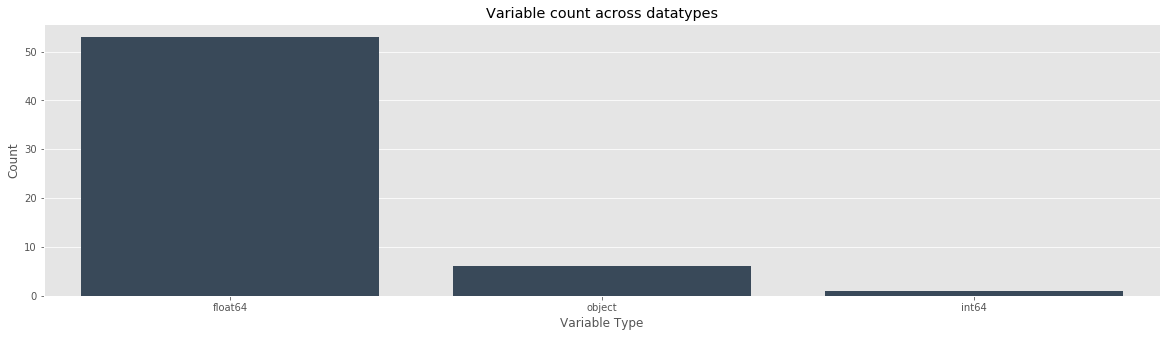

In [8]:
# Visualizing Datatypes
dataTypeDf = pd.DataFrame(merged.dtypes.value_counts().reset_index().rename(columns={'index':'variableType', 0: 'count'}))
# merged.dtypes.value_counts().reset_index().rename(columns={'index':'variableType', 0: 'count'})
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=dataTypeDf, x='variableType', y='count', ax=ax, color='#34495e')
ax.set(xlabel='Variable Type', ylabel = 'Count', title='Variable count across datatypes')

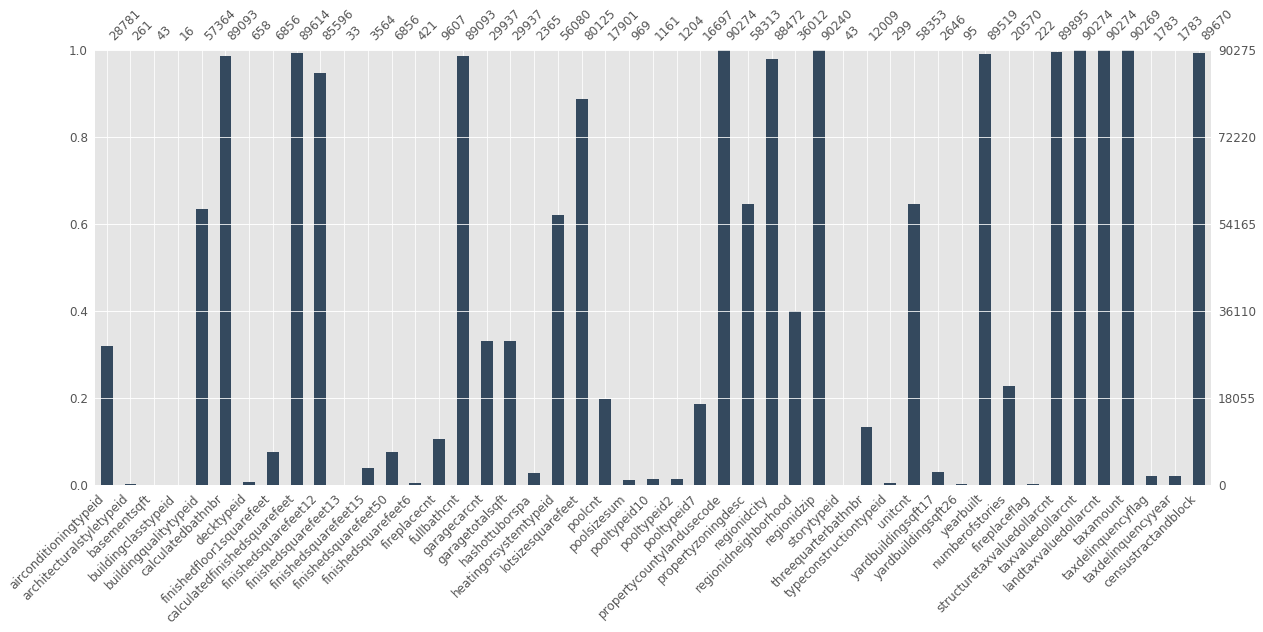

In [9]:
# Missing value analysis
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missingValueColumns], figsize=(20,8), color='#34495e', fontsize=12, labels=True)

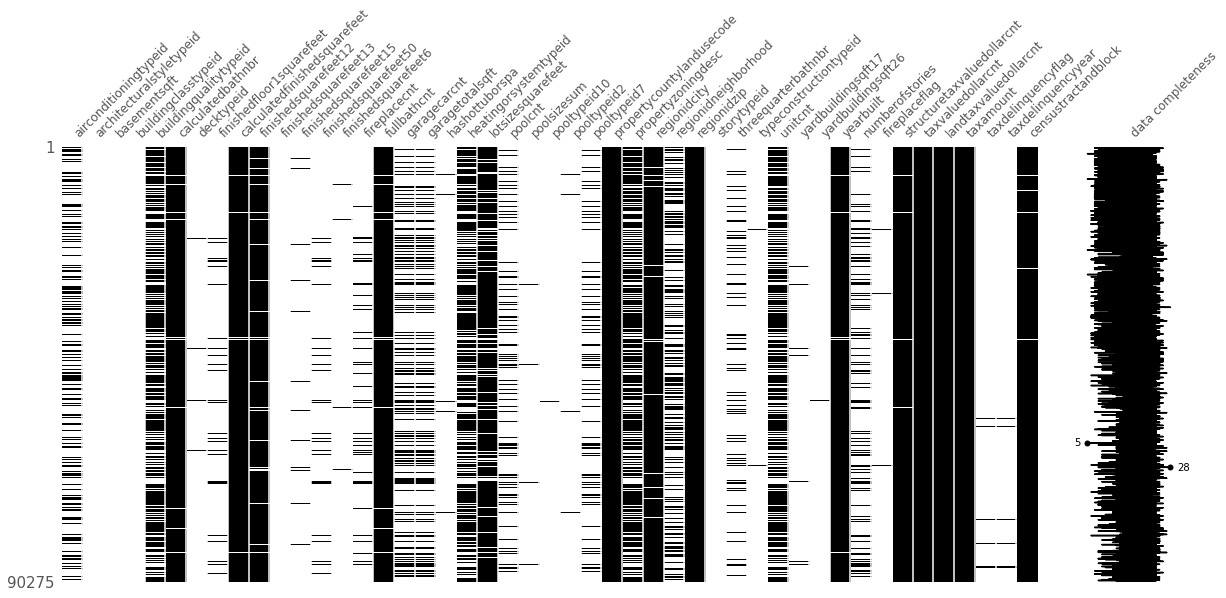

In [10]:
msno.matrix(merged[missingValueColumns], width_ratios=(10,1), figsize=(20,8), color=(0,0,0), fontsize=12, sparkline=True, labels=True)

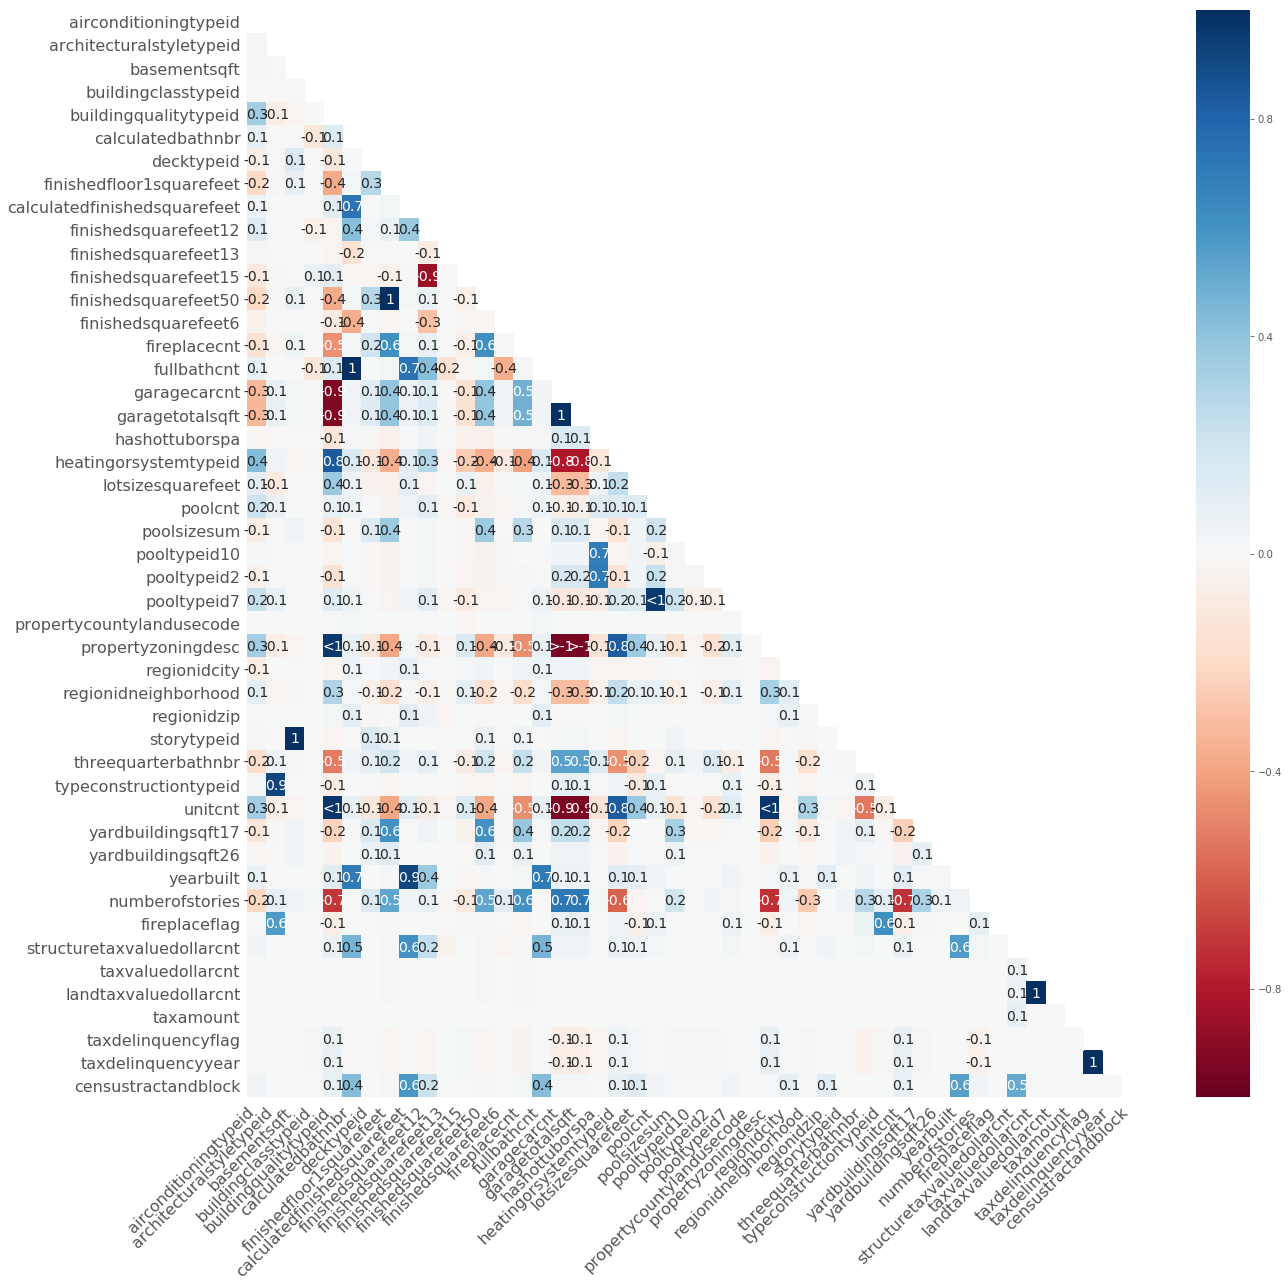

In [30]:
msno.heatmap(merged[missingValueColumns], figsize=(20,20))


In [ ]:
# Top feature selection
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

mergedFiltered = merged.fillna(-999)
for f in mergedFiltered.columns:
    if mergedFiltered[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(mergedFiltered[f].values)) 
        mergedFiltered[f] = lbl.transform(list(mergedFiltered[f].values))
        #print(mergedFiltered[f][1:5])
        #print('*************')
#
train_y = mergedFiltered.logerror.values
train_x = mergedFiltered.drop(['parcelid', 'transactiondate', 'logerror'], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}
dtrain = xgb.DMatrix(train_x, train_y, feature_names=train_x.columns.values)
model = xgb.train(dict(xgb_params), dtrain, num_boost_round=100)

featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'], ascending=False, inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sn.barplot(data=features.head(15), x='importance', y='features', ax=ax, orient='h', color='#34495e')


In [ ]:
# test preprocessing from sklearn
m = []
for c in merged.columns:
    if merged[c].dtype == 'object':
        m.append(c)
m
# hashottuborspa
print(merged['hashottuborspa'].values)
print(merged['hashottuborspa'].dtype)
lbl = preprocessing.LabelEncoder()
lbl.fit(list(merged['hashottuborspa'].values))
lbl.transform(list(merged['hashottuborspa'].values))
print(merged['hashottuborspa'].values)
print(merged['hashottuborspa'].dtype)

In [ ]:
# Correlation analysis
topFeatures = features['features'].tolist()[1:20]
corrMatt = merged[topFeatures].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask, vmax=0.8, square=True)